**1. Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.**

In [162]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [163]:
# функция для расчета MSE
def mserror(X, w, y):
    y_pred = X.T.dot(w)
    return (sum((y_pred - y)**2)) / len(y)

In [164]:
# функция классического градиентного спуска
def gradient_descent(X, y, w, alpha, max_iter, eps):
  # список векторов весов после каждой итерации
  w_list = [w.copy()]
  # список значений ошибок после каждой итерации
  errors = []
  weight_dist = np.inf
  iter_num = 0
  # ход градиентного спуска
  while weight_dist > eps and iter_num < max_iter:
      new_w = w - 2 * alpha * np.dot(X, (np.dot(X.T, w) - y)) / y.shape[0]
      weight_dist = np.linalg.norm(new_w - w, ord=2)
      
      w_list.append(new_w.copy())
      errors.append(mserror(X, new_w, y))
      
      iter_num += 1
      w = new_w

      if iter_num % 50 == 0:
        print(mserror(X, new_w, y))

  w_list = np.array(w_list)

  return w_list, iter_num, errors

In [165]:
# сгенерируем набор данных
data, target, coef = datasets.make_regression(n_samples=10000, n_features = 4, n_informative = 4, n_targets = 1, 
                                              noise = 12, coef = True, random_state = 48)


Отмасштабируем получившиеся признаки методом стандартизации

In [166]:
data

array([[ 1.25393964, -0.59129141, -0.7991956 ,  2.11480641],
       [-0.27707839,  1.33244002, -0.88123664,  0.87868857],
       [ 1.97808434,  0.34839986, -1.41406974, -0.35520585],
       ...,
       [-0.14940307, -0.7102625 , -0.02219816,  1.31786474],
       [ 2.27180855, -1.57519816,  2.25158686, -0.38962748],
       [ 0.22045829,  2.04814167, -0.21044402,  0.49915205]])

In [167]:
means = np.mean(data, axis=0)
stds = np.std(data, axis=0)

means, stds

(array([-0.00861676,  0.00816686, -0.01464084, -0.01492145]),
 array([0.99457148, 1.0103236 , 1.00432089, 0.99602267]))

In [168]:
# функция стандартизации данных
def data_standardizer(data, means, stds):
  standart_data = []
  for features in range(data.shape[1]):
    feature = [i[features] for i in data]
    matrix_column = (feature - means[features]) / stds[features]
    standart_data.append(matrix_column)

  return np.array(standart_data).T

In [169]:
st_data = data_standardizer(data=data, means=means, stds=stds)
st_data

array([[ 1.26944762, -0.59333294, -0.78117937,  2.13823231],
       [-0.26992693,  1.31074158, -0.86286745,  0.89717839],
       [ 1.99754482,  0.33675645, -1.39340814, -0.34164322],
       ...,
       [-0.14155474, -0.71108837, -0.0075248 ,  1.33810828],
       [ 2.29287222, -1.56718602,  2.25647771, -0.37620231],
       [ 0.23032538,  2.01913011, -0.19496077,  0.5161263 ]])

In [170]:
# подберем веса с помощью классического градиентного спуска
w = np.zeros(st_data.shape[1])
w_list, iter_num, errors = gradient_descent(st_data.T, target, w, 0.01, 1000, 1e-8)

1271.4169442353439
294.822735828309
165.66100039628535
148.575939783641
146.31564810638105
146.01657301317667
145.97699386877233
145.97175514313903
145.97106162022476
145.97096979229246
145.970957631254
145.97095602041693
145.97095580700312
145.9709557787238
145.97095577497583
145.97095577447837
145.970955774412
145.9709557744045


In [171]:
# функция стохастического градиентного спуска
def sgd(X, y, w, alpha, max_iter, eps):
  # список векторов весов после каждой итерации
  w_list = [w.copy()]
  # список значений ошибок после каждой итерации
  errors = []
  weight_dist = np.inf
  iter_num = 0
  # ход градиентного спуска
  while weight_dist > eps and iter_num < max_iter:

      # генерируем случайный индекс объекта выборки
      train_ind = np.random.randint(data.shape[0])
      # обновляем веса
      new_w = w - 2 * alpha * np.dot(X[train_ind], (np.dot(X[train_ind], w) - y[train_ind])) / y.shape[0]

      weight_dist = np.linalg.norm(new_w - w, ord=2)
      
      w_list.append(new_w.copy())
      errors.append(mserror(X.T, new_w, y))
      
      iter_num += 1
      w = new_w

      if iter_num % 1000 == 0:
        print(mserror(X.T, new_w, y))

  w_list = np.array(w_list)

  return w_list, iter_num, errors

In [172]:
# подберем веса с помощью стохастического градиентного спуска

w = np.zeros(st_data.shape[1])
w_list_sgd, iter_num_sgd, errors_sgd = sgd(st_data, target, w, 1, 20000, 1e-8)

5850.850951870073
4026.5795804709783
2736.027769285708
1904.767037312688
1320.9130402509722
934.4986819876382
671.977030834208
502.4953382686414
380.919032586684
302.07331167936144
251.2796532792863
216.2788120486686
192.51243067131114
177.2271048515301
165.70609081120023
159.51235741173758
155.23957376456113
152.23937702221366
149.9131649568444
149.0480812119483


Text(0, 0.5, 'MSE')

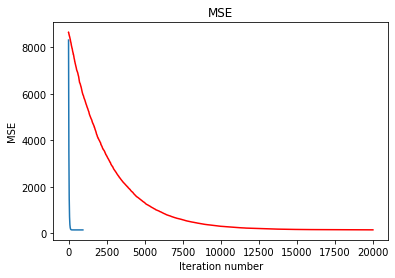

In [173]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors)), errors)
plt.plot(range(len(errors_sgd)), errors_sgd, color='r')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

С точки зрения количества итераций очевидно, что стохастический градиентный спуск оптимизируется за большее количество итераций. Но зато он может обучаться, используя незначительные ресурсы оперативной памяти.

**2. Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации и сравнить результаты.**

In [174]:
# функция классического градиентного спуска с L2-регуляризацией
def gradient_descent_l2(X, y, w, alpha, max_iter, eps, lambda_=1):
  # список векторов весов после каждой итерации
  w_list = [w.copy()]
  # список значений ошибок после каждой итерации
  errors = []
  weight_dist = np.inf
  iter_num = 0
  # ход градиентного спуска
  while weight_dist > eps and iter_num < max_iter:
      #добавляем регуляризатор в формулу обновления весов
      new_w = w - (2 * 2 * alpha * np.dot(X, (np.dot(X.T, w) - y) + lambda_*np.linalg.norm(w))) / y.shape[0]
      weight_dist = np.linalg.norm(new_w - w, ord=2)
      
      w_list.append(new_w.copy())
      errors.append(mserror(X, new_w, y))
      
      iter_num += 1
      w = new_w

      if iter_num % 50 == 0:
        print(mserror(X, new_w, y))

  w_list = np.array(w_list)

  return w_list, iter_num, errors

In [175]:
w = np.zeros(st_data.shape[1])
w_list, iter_num, errors = gradient_descent_l2(st_data.T, target, w, 0.01, 1000, 1e-8)

288.73332870764926
148.36722437774765
146.0112035995891
145.97163225802962
145.970967153421
145.97095596596537
145.97095577763042
145.97095577445725
145.9709557744035


Использование регуляризатора позволило значительно увеличить скорость сходимости на сгенерированных данных

На 3-е опциональное задание, к сожалению, нет времени